In [6]:
import tensorflow as tf
import os

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)


In [11]:
os.listdir("C:/Users/Hemanth Gowda R M")

['.anaconda',
 '.bash_history',
 '.cache',
 '.conda',
 '.condarc',
 '.continuum',
 '.dotnet',
 '.eclipse',
 '.emulator_console_auth_token',
 '.git-for-windows-updater',
 '.gitconfig',
 '.gradle',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jdks',
 '.jupyter',
 '.keras',
 '.lesshst',
 '.m2',
 '.matplotlib',
 '.ms-ad',
 '.p2',
 '.quokka',
 '.skiko',
 '.vscode',
 '.wallaby',
 'acu',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Documents',
 'Downloads',
 'eclipse',
 'Favorites',
 'java',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{11ac73cd-e977-11ed-a955-505a65c8405e}.TM.blf',
 'NTUSER.DAT{11ac73cd-e977-11ed-a955-505a65c8405e}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{11ac73cd-e977-11ed-a955-505a65c8405e}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'PrintHood',
 'Project',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'sourc

In [15]:
#Data cleaning

import cv2
import imghdr
from matplotlib import pyplot as plt 

In [16]:
data_dir="train"

In [17]:
os.listdir(data_dir)

['aphids',
 'armyworm',
 'beetle',
 'bollworm',
 'grasshopper',
 'mites',
 'mosquito',
 'sawfly',
 'stem_borer']

In [18]:
image_exts=['jpeg','jpg','bmp','png']

In [19]:
img=cv2.imread(os.path.join('train','aphids', 'jpg_2.jpg'))

In [20]:
img.shape

(183, 275, 3)

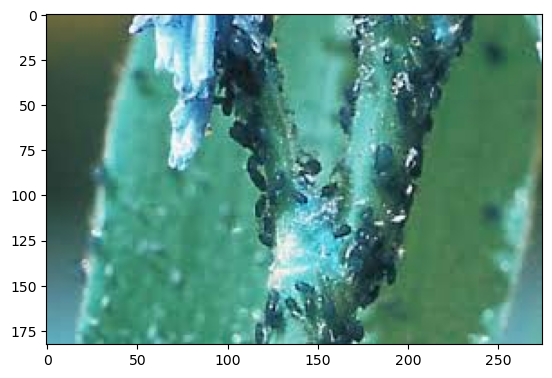

In [21]:
plt.imshow(img)
plt.show()

In [22]:
for img_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,img_class)):
        img_path=os.path.join(data_dir,img_class,image)
        try:
            img=cv2.imread(img_path)
            tip=imghdr.what(img_path)
            if tip not in image_exts:
                print('image not in ext list {}'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('issue with image {}'.format(img_path))

In [23]:
# data Load

tf.data.Dataset??


In [24]:
import numpy as np
from matplotlib import pyplot as plt

In [25]:
data = tf.keras.utils.image_dataset_from_directory('train')

Found 2695 files belonging to 9 classes.


In [26]:
data_iterator = data.as_numpy_iterator()

In [27]:
# get new batch from iterator
batch = data_iterator.next( )

In [28]:
len(batch)

2

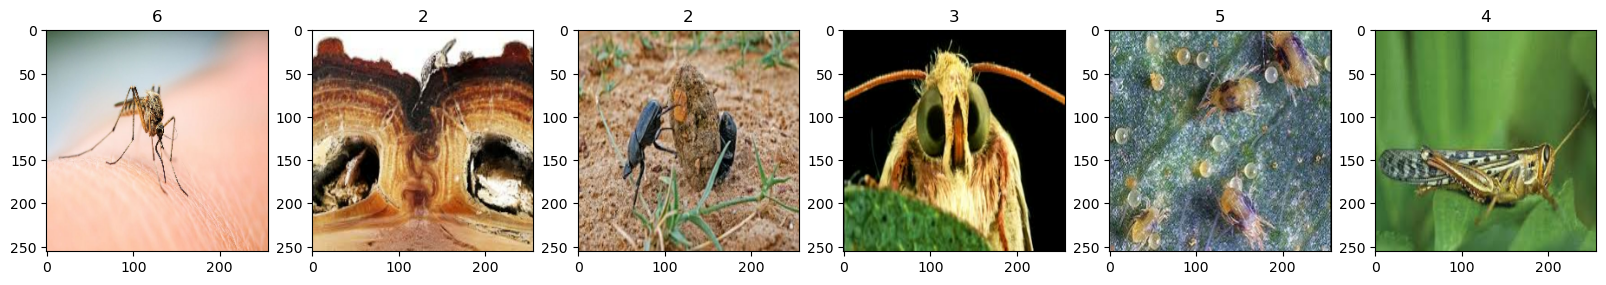

In [29]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [30]:
# preprocess Data
# Scalling

data = data.map(lambda x,y:(x/255,y))

In [31]:
scaled_iterator= data.as_numpy_iterator()

In [32]:
batch = scaled_iterator.next()

In [33]:
batch[0].max()

1.0

In [34]:
batch[0].min()

0.0

In [35]:
# spliting data

len(data)

85

In [36]:
train_size = int(len(data)*0.7) # 70% training data
validation_size = int(len(data)*0.2) # 20% validation data
test_size = int(len(data)*0.1)+1 # 10% test data

In [37]:
train_size+validation_size+test_size

85

In [38]:
#take and skip methods
train = data.take(train_size)
val = data.skip(train_size).take(validation_size)
test = data.skip(train_size+validation_size).take(test_size)


In [39]:
# building deep learing model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [40]:
model = Sequential()

In [41]:
 

model.add(Conv2D(16,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(9,activation='softmax'))

C:\Users\Hemanth Gowda R M\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [42]:
model.compile('adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics =['accuracy'])

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,698,681 (14.11 MB)

 Trainable params: 3,698,681 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Training the model

logdir = 'logs'

In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
hits = model.fit(train,epochs=5,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 291ms/step - accuracy: 0.9992 - loss: 0.0128 - val_accuracy: 0.9890 - val_loss: 0.0816
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - accuracy: 0.9950 - loss: 0.0294 - val_accuracy: 0.9908 - val_loss: 0.0558
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - accuracy: 0.9996 - loss: 0.0041 - val_accuracy: 0.9853 - val_loss: 0.1302
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - accuracy: 0.9978 - loss: 0.0258 - val_accuracy: 0.9890 - val_loss: 0.0846
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 17s 289ms/step - accuracy: 0.9972 - loss: 0.0205 - val_accuracy: 0.9926 - val_loss: 0.0742


In [48]:
hits.history

{'accuracy': [0.9984109997749329,
  0.9973517060279846,
  0.9994703531265259,
  0.9973517060279846,
  0.9968220591545105],
 'loss': [0.018326012417674065,
  0.02145804651081562,
  0.005312359891831875,
  0.026523886248469353,
  0.021572593599557877],
 'val_accuracy': [0.9889705777168274,
  0.9908088445663452,
  0.9852941036224365,
  0.9889705777168274,
  0.9926470518112183],
 'val_loss': [0.08159266412258148,
  0.05578067898750305,
  0.13018451631069183,
  0.0845993161201477,
  0.07422365993261337]}

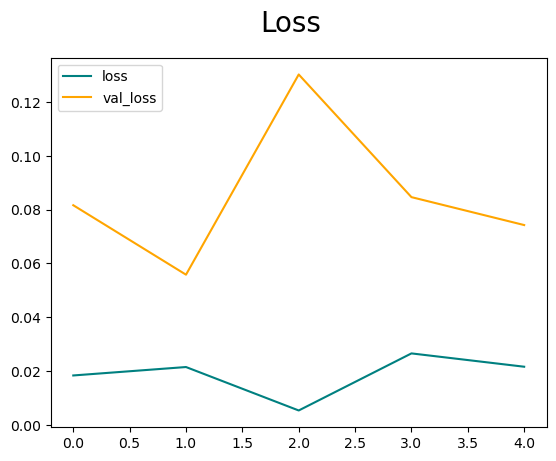

In [49]:
# ploting performance

fig = plt.figure()
plt.plot(hits.history['loss'],color='teal',label='loss')
plt.plot(hits.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

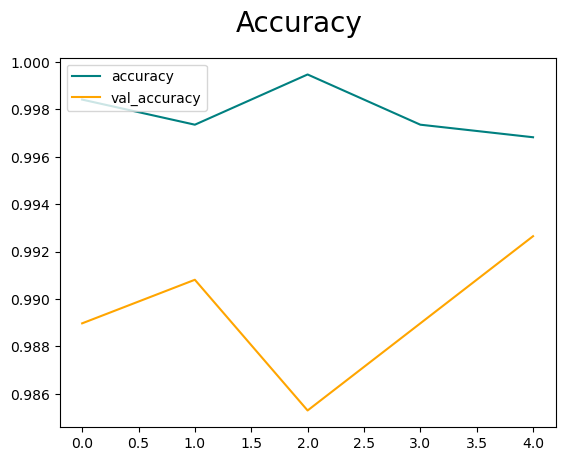

In [50]:
fig = plt.figure()
plt.plot(hits.history['accuracy'],color='teal',label='accuracy')
plt.plot(hits.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [51]:
# Evaluation

model.evaluate(test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9951 - loss: 0.0562


[0.08925260603427887, 0.9923954606056213]

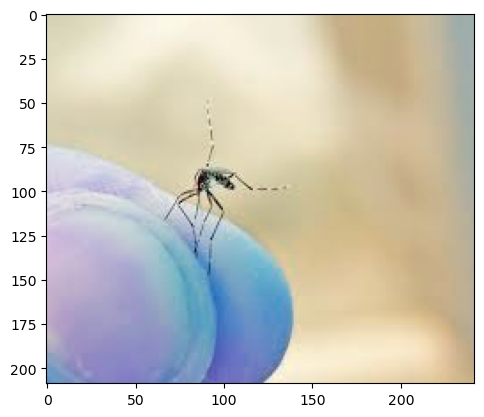

In [52]:
# Test

img = cv2.imread('C:/Users/Hemanth Gowda R M/Downloads/test/mosquito/jpg_9.jpg')
plt.imshow(img)
plt.show()

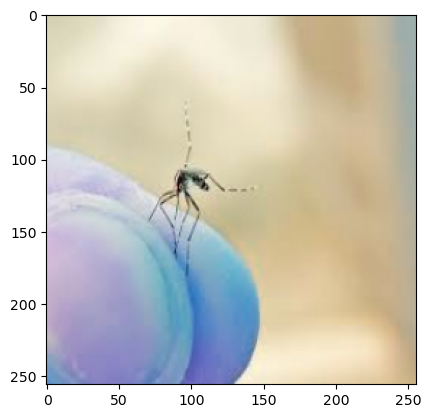

In [53]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[212.      , 209.      , 181.      ],
        [212.      , 209.      , 181.      ],
        [212.      , 209.      , 181.      ],
        ...,
        [158.      , 175.      , 171.13672 ],
        [157.83594 , 175.      , 172.      ],
        [156.      , 175.      , 172.      ]],

       [[212.      , 209.      , 181.      ],
        [212.      , 209.      , 181.      ],
        [212.      , 209.      , 181.      ],
        ...,
        [158.      , 175.      , 171.13672 ],
        [157.83594 , 175.      , 172.      ],
        [156.      , 175.      , 172.      ]],

       [[212.54102 , 209.54102 , 181.54102 ],
        [212.54102 , 209.54102 , 181.54102 ],
        [212.54102 , 209.54102 , 181.54102 ],
        ...,
        [158.      , 175.      , 171.13672 ],
        [157.83594 , 175.      , 172.      ],
        [156.      , 175.      , 172.      ]],

       ...,

       [[ 96.541016, 143.62305 , 196.54102 ],
        [ 98.

In [55]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [56]:
yhat

array([[6.3106352e-03, 9.2268462e-04, 6.3821431e-03, 7.3954527e-04,
        6.3749468e-03, 1.6020945e-03, 9.7037494e-01, 3.8858920e-03,
        3.4070639e-03]], dtype=float32)

In [57]:
y_classes = np.argmax(yhat) 
y_classes

6

In [58]:
classes=['Aphids','ArmyWorm','Beetle','Ballworm','Grasshoper','Mites','Moquito','Sawfly','Stemborer']

In [59]:
classes

['Aphids',
 'ArmyWorm',
 'Beetle',
 'Ballworm',
 'Grasshoper',
 'Mites',
 'Moquito',
 'Sawfly',
 'Stemborer']

In [60]:
classes[y_classes]

'Moquito'

In [61]:
# Frontend

import gradio as gr


In [62]:
def predict_pest(img):
    resize=tf.image.resize(img,(256,256))
    yhat=model.predict(np.expand_dims(resize/255,0))
    return classes[np.argmax(yhat)]

In [63]:
image = gr.Image()
label = gr.Label()

demo=gr.Interface(fn=predict_pest,inputs=image,outputs=label)
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
